<a href="https://colab.research.google.com/github/azkbrqlna/2025-ComputerVision/blob/main/Jobsheet2_KlasifikasiGambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praktikum D1 - Memulai Klasifikasi Gambar dengan Dataset Sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


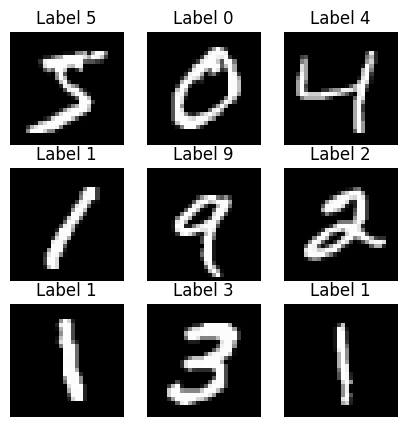

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh 9 gambar pertama
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label {y_train[i]}")
    plt.axis('off')

plt.show()

### Tugas Kecil : Cobalah ganti `range(9)` dengan `range(25)` untuk menampilkan lebih banyak contoh!

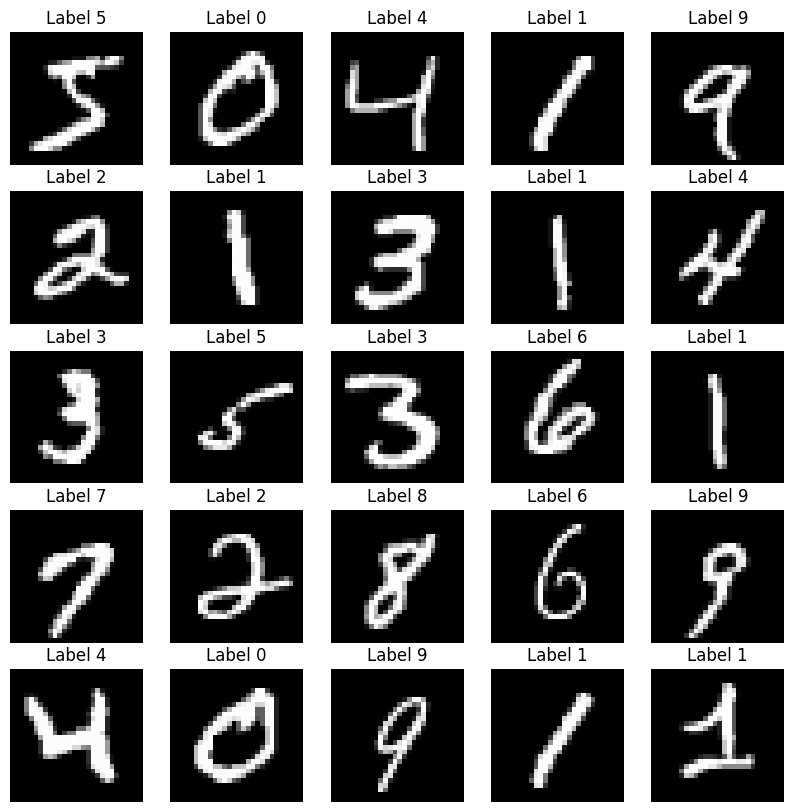

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label {y_train[i]}")
    plt.axis('off')

plt.show()

## Praktikum D2 - Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [7]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])

y_pred = clf.predict(x_test_flat)
print(f"Akurasi : {accuracy_score(y_test, y_pred)}")


Akurasi : 0.9101


### Tugas Kecil : Ubah kernel dari `linear` menjadi `rbf`. Bagaimana pengaruhnya terhadap

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])

y_pred = clf.predict(x_test_flat)
print(f"Akurasi : {accuracy_score(y_test, y_pred)}")


Akurasi : 0.9513


## Praktikum D3 - Membangun CNN Sederhana

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8922 - loss: 0.3661 - val_accuracy: 0.9790 - val_loss: 0.0788
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9804 - loss: 0.0649 - val_accuracy: 0.9862 - val_loss: 0.0546
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9877 - loss: 0.0417 - val_accuracy: 0.9863 - val_loss: 0.0515
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9910 - loss: 0.0292 - val_accuracy: 0.9852 - val_loss: 0.0518
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9936 - loss: 0.0203 - val_accuracy: 0.9815 - val_loss: 0.0729


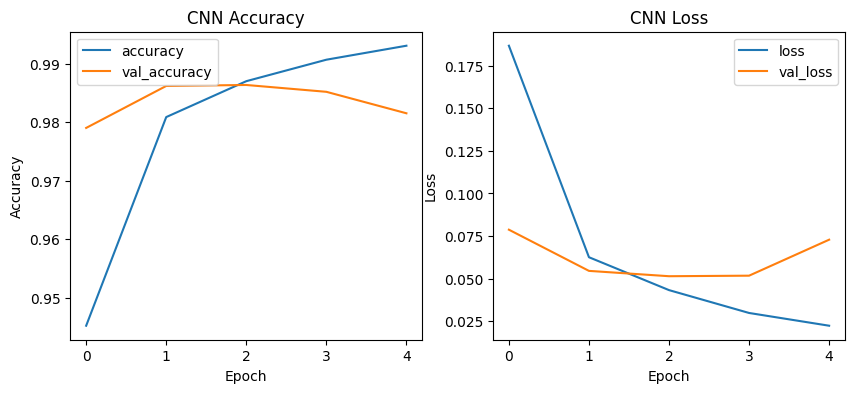

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=(0.1))

# Plot History
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Tugas kecil: Tambahkan satu lapisan Conv2D lagi sebelum Flatten. Apakah akurasinya meningkat?



Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 28ms/step - accuracy: 0.8977 - loss: 0.3319 - val_accuracy: 0.9820 - val_loss: 0.0568
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9839 - loss: 0.0520 - val_accuracy: 0.9845 - val_loss: 0.0538
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9895 - loss: 0.0336 - val_accuracy: 0.9897 - val_loss: 0.0367
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9929 - loss: 0.0223 - val_accuracy: 0.9890 - val_loss: 0.0392
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9937 - loss: 0.0181 - val_accuracy: 0.9908 - val_loss: 0.0377


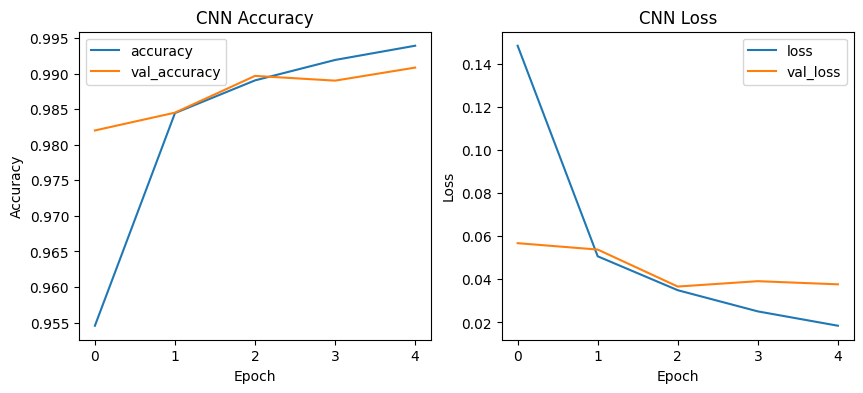

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'), # Saya menambahkan ini
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=(0.1))

# Plot History
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()